<a href="https://colab.research.google.com/github/tbarnette70/tbarnette70/blob/main/INN_Learner_Notebook_Full_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [ ]:
######################################################################################
#      Tim Barnette - Bank Churn Prediction - Project - Neural Networks              #
######################################################################################
# Library for data manipulation and analysis.
import pandas as pd
# Fundamental package for scientific computing.
import numpy as np
#splitting datasets into training and testing sets.
from sklearn.model_selection import train_test_split
#Imports tools for data preprocessing including label encoding, one-hot encoding, and standard scaling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
#Imports a class for imputing missing values in datasets.
from sklearn.impute import SimpleImputer
#Imports the Matplotlib library for creating visualizations.
import matplotlib.pyplot as plt
# Imports the Seaborn library for statistical data visualization.
import seaborn as sns
# Time related functions.
import time
#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report


#Imports the tensorflow,keras and layers.
import tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras import backend

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/mccomb/Introduction to Neural Networks/Project - Bank Churn/'

# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
tf.keras.utils.set_random_seed(812)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it will affect the overall performance, so be mindful of that.
tf.config.experimental.enable_op_determinism()

#Reading the dataset.
Data = pd.read_csv('bank-1.csv')

Mounted at /content/drive
/content/drive/MyDrive/mccomb/Introduction to Neural Networks/Project - Bank Churn


## Data Overview

Displaying the first fiew rows of data

In [ ]:
#See top of dataframe
print(Data.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

Displaying the last fiew rows of data

In [ ]:
#Get end of dataframe
print(Data.tail())

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.5

Checking the Shape of the data

In [ ]:
#Get rows and columns
Data.shape

(10000, 14)

This data has 10,000 rows and 14 columns

Checking the data types

In [ ]:
#Get dataframe structure
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


There are 10,000 records and 14 columns
3 strings
9 integers
2 floating point

Check for duplicates and missing values

In [ ]:
#Look for duplicate data
Data.duplicated().sum()

0

In [ ]:
#Look for nulls
round(Data.isnull().sum() / Data.isnull().count() * 100, 2)

,0
RowNumber,0.0
CustomerId,0.0
Surname,0.0
CreditScore,0.0
Geography,0.0
Gender,0.0
Age,0.0
Tenure,0.0
Balance,0.0
NumOfProducts,0.0


No duplicates or missing values

Check distribution of dependent variable

In [ ]:
#Get spread for dependent variable.
Data["Exited"].value_counts(1)

,proportion
Exited,
0,0.7963
1,0.2037


In [ ]:
#Look at statistics of data
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [ ]:
#Unique values by feature, identify totally useless features in predicting
Data.nunique()

,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


In [ ]:
#How much by category for string objects
for i in Data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(Data[i].value_counts())
    print("*" * 50)

Unique values in Surname are :
Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64
**************************************************
Unique values in Geography are :
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
**************************************************
Unique values in Gender are :
Gender
Male      5457
Female    4543
Name: count, dtype: int64
**************************************************


## Exploratory Data Analysis

Remove features with only unique values.

In [ ]:
###Records with a unique person identifier are not useful for dependency
###as an independent variable.  Those features will be dropped.
Data = Data.drop(['CustomerId'],axis=1)
Data = Data.drop(['Surname'],axis=1)
Data = Data.drop(['RowNumber'],axis=1)

The below functions need to be defined to carry out the Exploratory Data Analysis. + Utility Functions

In [ ]:
# Function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

    # Function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

    ### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

    # function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold
    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},
        index=[0],
    )

    return df_perf

### Univariate Analysis

Geography

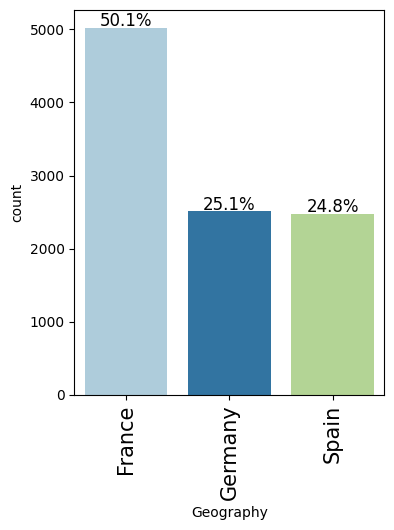

In [ ]:
#Univariate Analysis for Geography
labeled_barplot(Data, "Geography",perc=True)

Gender

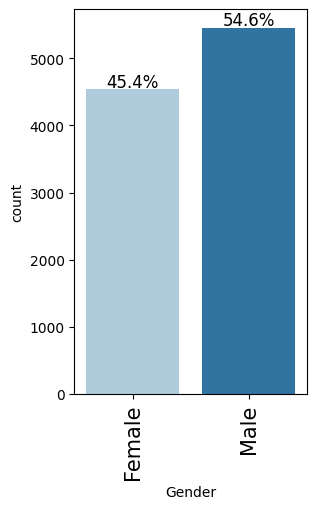

In [ ]:
#Univariate Analysis for Gender
labeled_barplot(Data, "Gender",perc=True)

HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited    
 Active Member

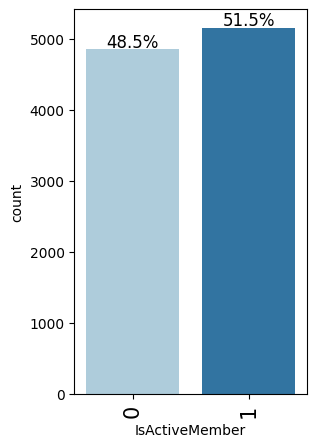

In [ ]:
#Univariate Analysis for Active Switch (is member active or not)
labeled_barplot(Data, "IsActiveMember",perc=True)

Has Credit Card

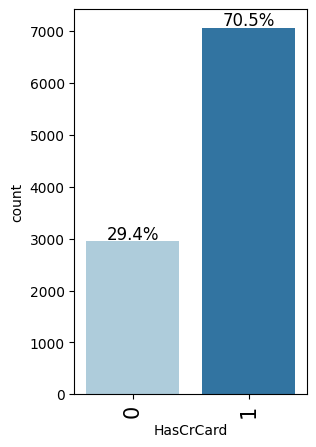

In [ ]:
#Univariate Analysis for Has Credit Card Switch
labeled_barplot(Data, "HasCrCard",perc=True)

Age

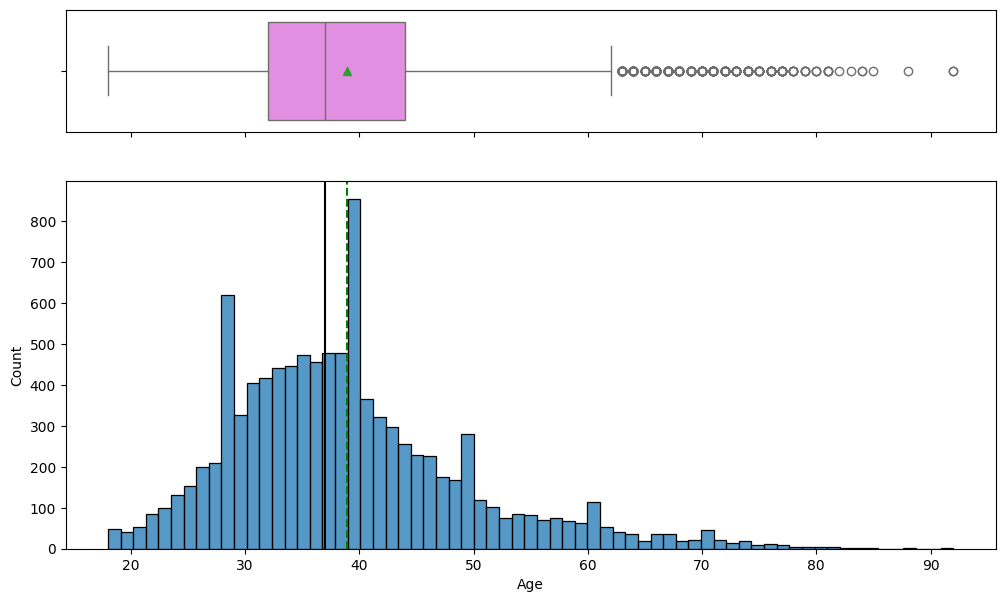

In [ ]:
#Univariate Analysis for Age
histogram_boxplot(Data, "Age")

Tenure

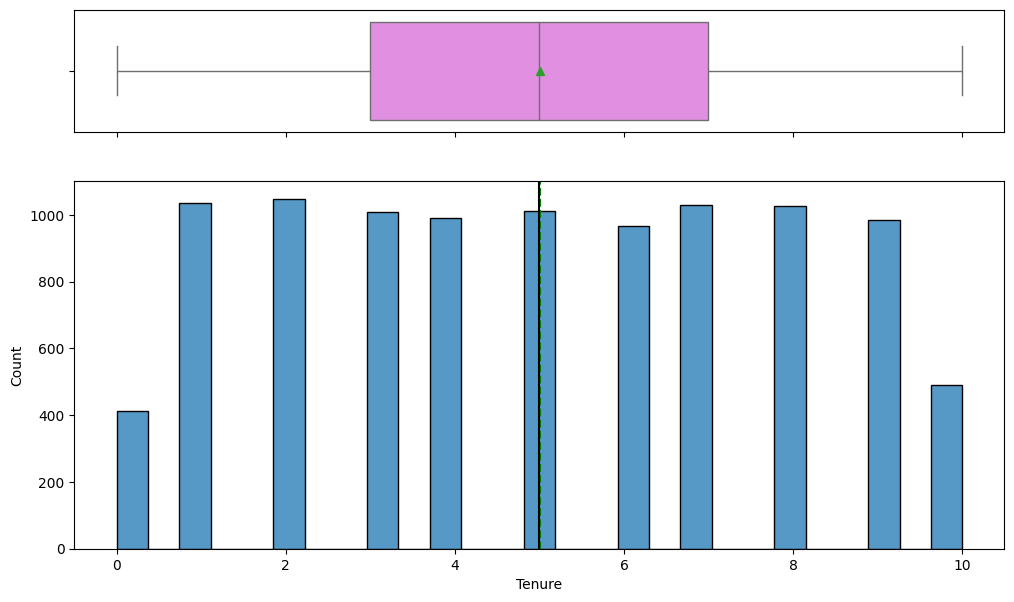

In [ ]:
#Univariate Analysis for Tenure
histogram_boxplot(Data, "Tenure")

Balance

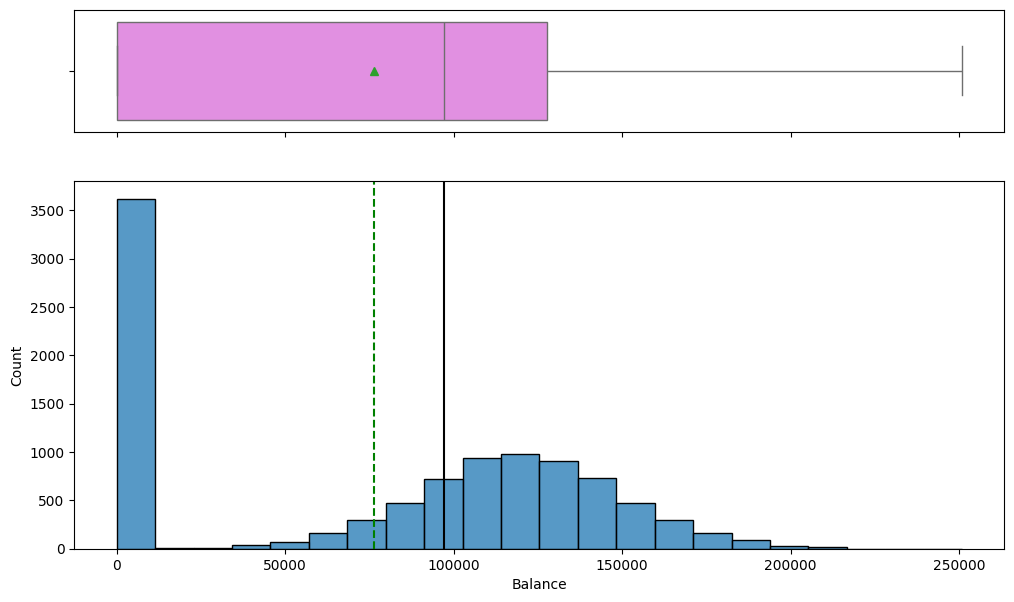

In [ ]:
#Univariate Analysis for Bank Balance
histogram_boxplot(Data, "Balance")

Estimated Salary

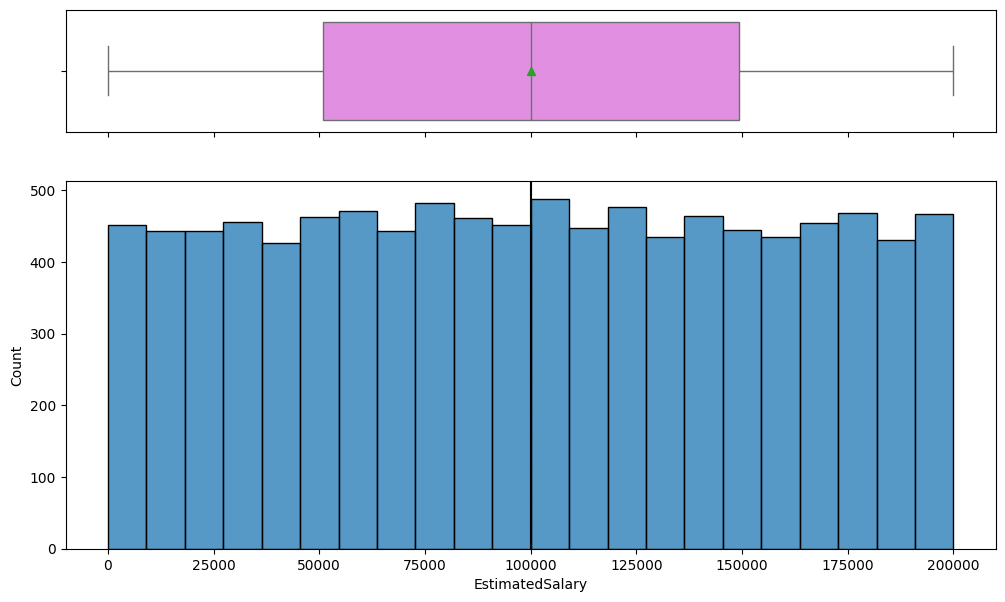

In [ ]:
#Univariate Analysis for Estimated Salary
histogram_boxplot(Data, "EstimatedSalary")

### Bivariate Analysis

Geography and Exited

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


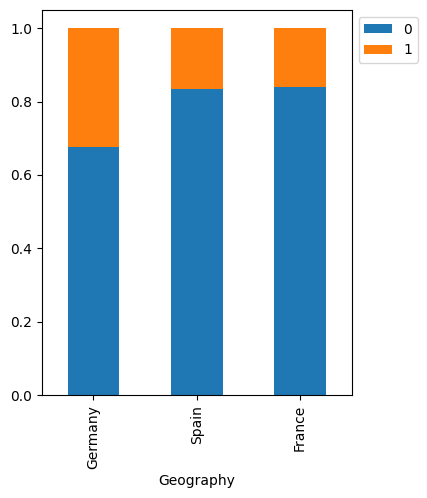

In [ ]:
#Bivariate Analysis for Geography
stacked_barplot(Data, "Geography", "Exited")

Gender and Exited

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


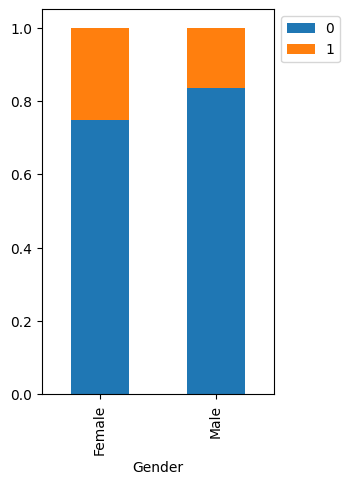

In [ ]:
#Bivariate Analysis for Gender
stacked_barplot(Data, "Gender", "Exited")

Is Active Member and Exited

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


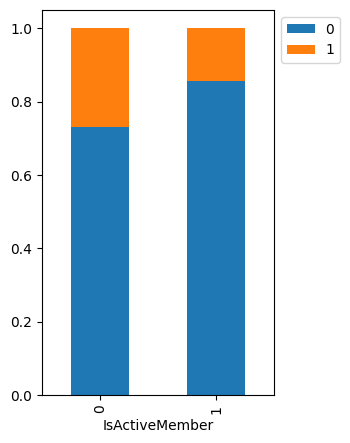

In [ ]:
#Bivariate Analysis for Active Member Switch
stacked_barplot(Data, "IsActiveMember", "Exited")

Has Credit Card and Exited

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


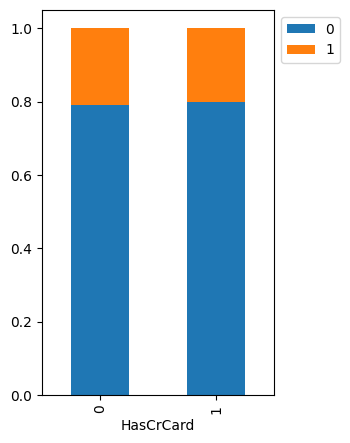

In [ ]:
#Bivariate Analysis for Has Credit Card Switch
stacked_barplot(Data, "HasCrCard", "Exited")

Age

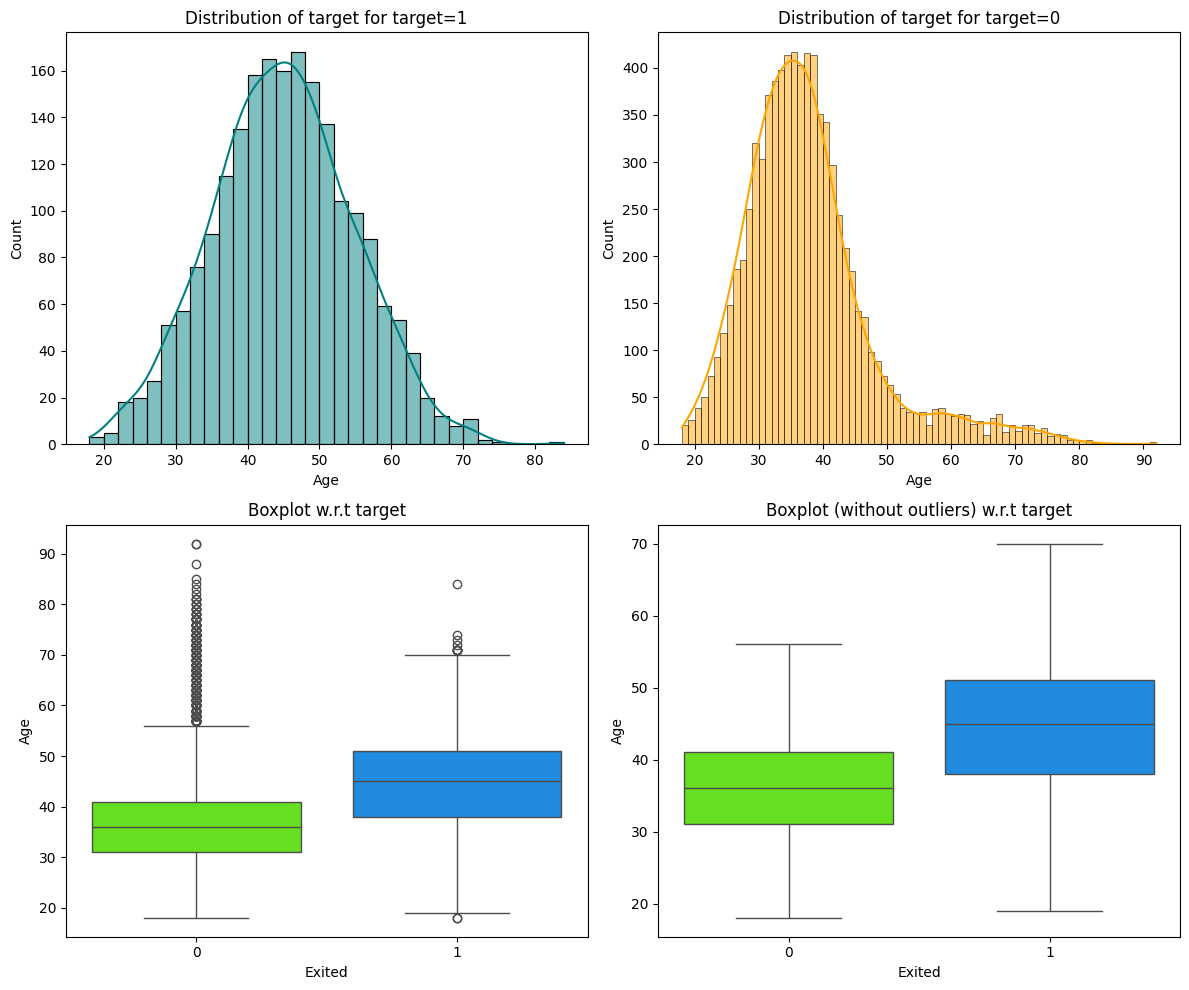

In [ ]:
#Bivariate Analysis for Age
distribution_plot_wrt_target(Data, "Age", "Exited")

Tenure

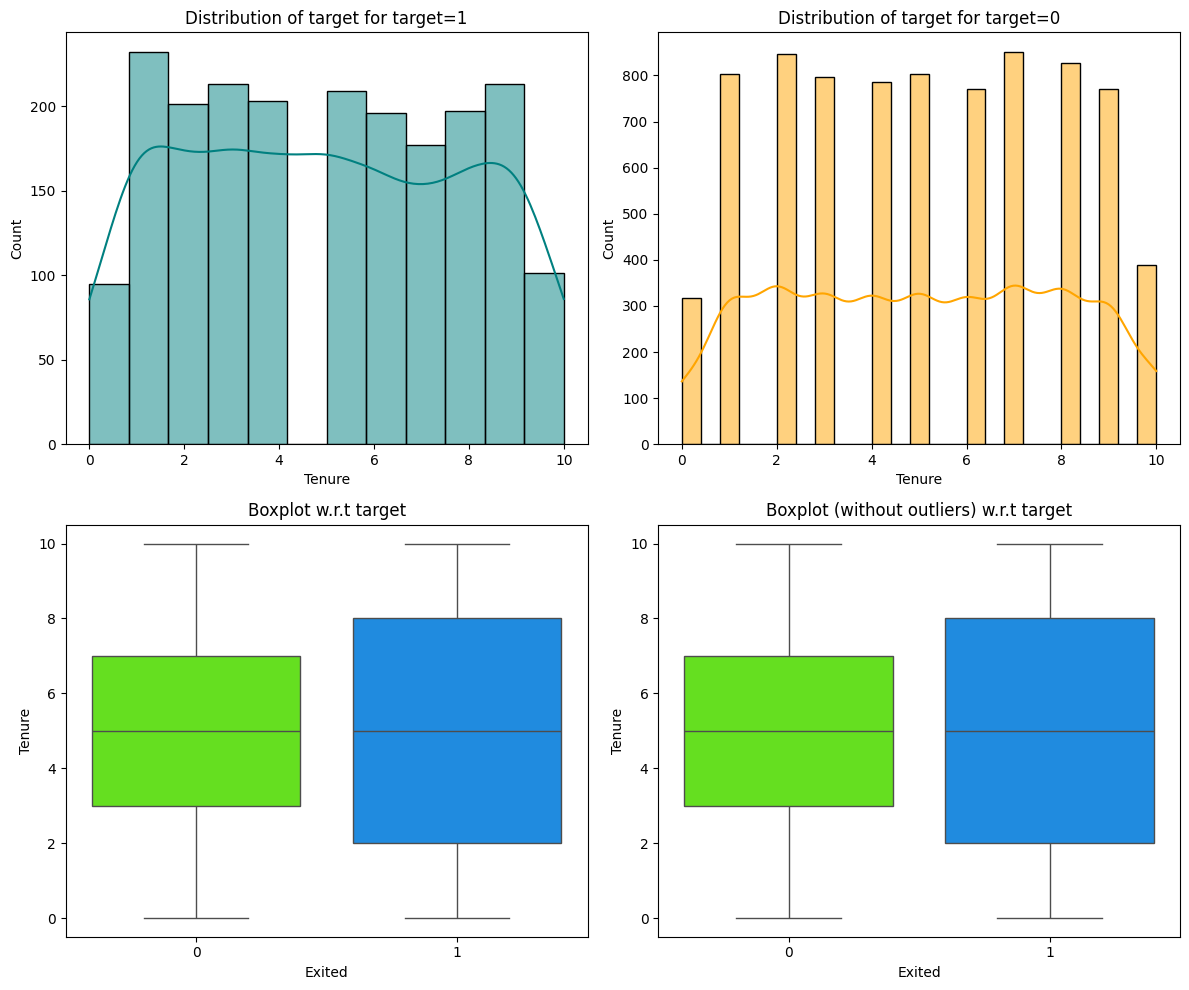

In [ ]:
#Bivariate Analysis for Tenure
distribution_plot_wrt_target(Data, "Tenure", "Exited")

Balance

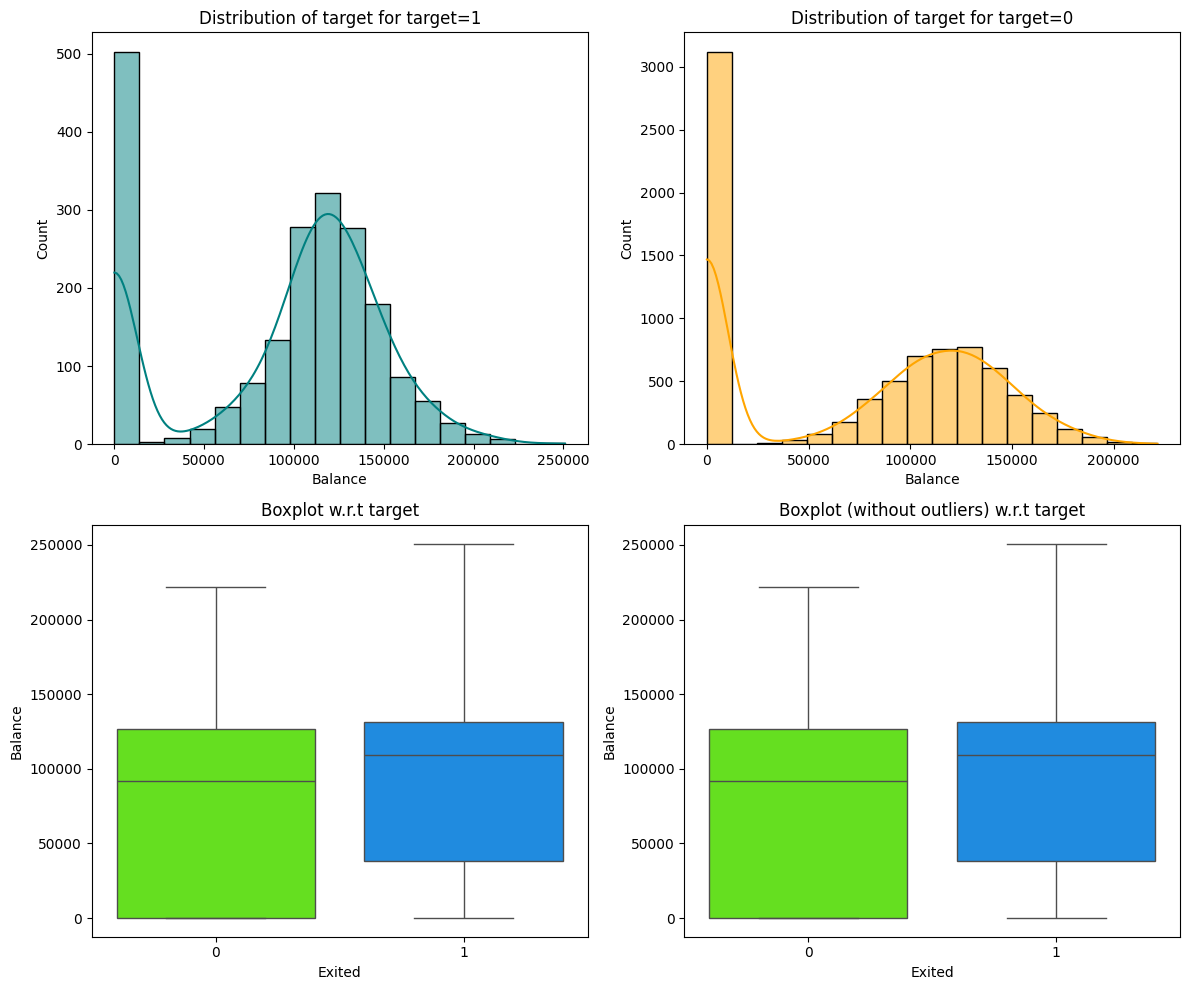

In [ ]:
#Bivariate Analysis for Bank Balance
distribution_plot_wrt_target(Data, "Balance", "Exited")

Estimated Salary

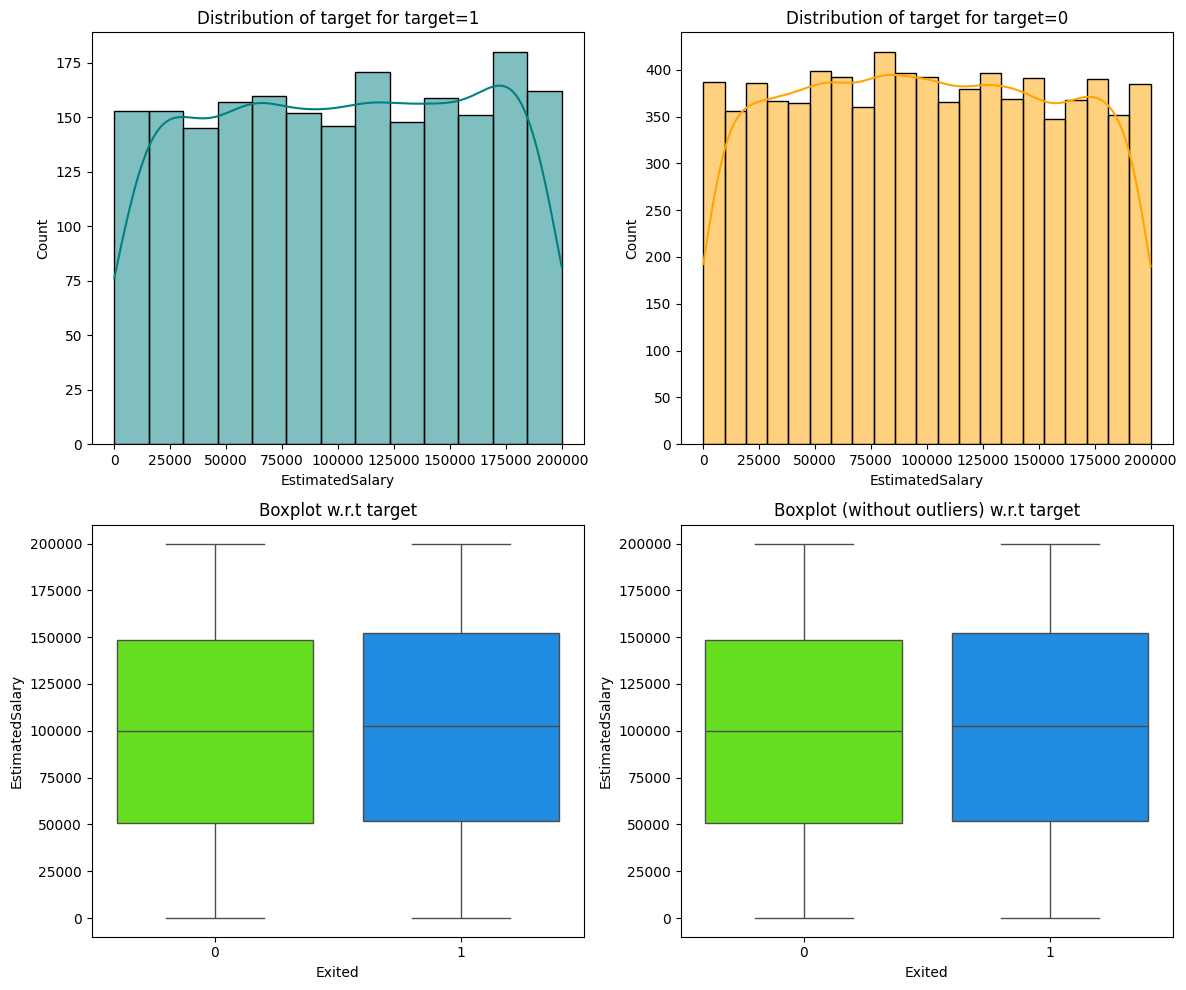

In [ ]:
#Bivariate Analysis for Estimated Salary
distribution_plot_wrt_target(Data, "EstimatedSalary", "Exited")

EDA Data Observations

Geography was a slight factor in exiting with Germany having the highest exit rating.

Gender was a slight factor in exiting with Females having the highest exit rating.

Age had a slight factor in exit rating.  As a person got older, they were less likely to leave.

Tenure and Balance and Estimated Salary seemed to have a limited affect on exit rating.

## Data Preprocessing

### Dummy Variable Creation

In [ ]:
# Create dummy variables for categorical features
print(Data.columns)
Data = pd.get_dummies(Data, columns=['Geography', 'Gender', 'IsActiveMember','HasCrCard'], drop_first=True)
print(Data.columns)


Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')
Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'EstimatedSalary', 'Exited', 'Geography_Germany', 'Geography_Spain',
       'Gender_Male', 'IsActiveMember_1', 'HasCrCard_1'],
      dtype='object')


Dependent and Independent Variable assignment

In [ ]:
## Separating Independent and Dependent Columns
X = Data.drop(['Exited'],axis=1)
Y = Data['Exited']

In [ ]:
X.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'EstimatedSalary', 'Geography_Germany', 'Geography_Spain',
       'Gender_Male', 'IsActiveMember_1', 'HasCrCard_1'],
      dtype='object')

In [ ]:
#Calculating the total number of nan values for each columns.
X.isnull().sum()

,0
CreditScore,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
EstimatedSalary,0
Geography_Germany,0
Geography_Spain,0
Gender_Male,0
IsActiveMember_1,0


### Train-validation-test Split

In [ ]:
# Splitting the dataset into the Training and Test set.
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42,stratify = Y)

In [ ]:
# Splitting the Train dataset into the Training and Validation set.
X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train, test_size = 0.2, random_state = 42,stratify = y_train)

In [ ]:
##converting to numpy array
y_train = y_train.to_numpy()
y_valid = y_valid.to_numpy()
y_test = y_test.to_numpy()


In [ ]:
##Examine data types and numaber of records
print(type(y_train))
print(y_train.dtype)
print(type(y_valid))
print(y_valid.dtype)
print(type(y_test))
print(y_test.dtype)
print(X_train.shape,y_train.shape)
print(X_valid.shape,y_valid.shape)
print(X_test.shape,y_test.shape)

<class 'numpy.ndarray'>
int64
<class 'numpy.ndarray'>
int64
<class 'numpy.ndarray'>
int64
(6400, 11) (6400,)
(1600, 11) (1600,)
(2000, 11) (2000,)


### Data Normalization

In [ ]:
## Scaling the data
sc=StandardScaler()
temp = sc.fit(X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_test[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_test[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_valid[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_valid[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])

In [ ]:
##Look at datatypes
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6400 entries, 3006 to 1558
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        6400 non-null   float64
 1   Age                6400 non-null   float64
 2   Tenure             6400 non-null   float64
 3   Balance            6400 non-null   float64
 4   NumOfProducts      6400 non-null   int64  
 5   EstimatedSalary    6400 non-null   float64
 6   Geography_Germany  6400 non-null   bool   
 7   Geography_Spain    6400 non-null   bool   
 8   Gender_Male        6400 non-null   bool   
 9   IsActiveMember_1   6400 non-null   bool   
 10  HasCrCard_1        6400 non-null   bool   
dtypes: bool(5), float64(5), int64(1)
memory usage: 381.2 KB


## Model Building

### Model Evaluation Criterion

Write down the logic for choosing the metric that would be the best metric for this business scenario.

- The goal is to determine if a customer is likely to leave the bank or not.  The decision comes down to True Positive vs False Positive.<BR>
- <B>True Positive</B> - This is important to know because these are the people that would actually leave the bank.  These are the people that we would actually invest in to stay.
- <B>False Positive</B> - This is not as important but still important to determine correctly. Here's why: If we are making an investment in customer retention and we're investing in customers that we think are going to leave but weren't really going to leave - we're not getting a good ROI for our retention dollars.
<BR><BR>
- <B> Conclusion</B> - Since both true and false positives are important, the most important metric to us is <B><U>F1</B></U>.


Utility Functions

In [ ]:
###Exited has a class imbalance 80% 0, 20% 1
# Calculate class weights for imbalanced dataset
cw = (y_train.shape[0]) / np.bincount(y_train)

# Create a dictionary mapping class indices to their respective class weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[i] = cw[i]

cw_dict

{0: 1.2558869701726845, 1: 4.9079754601226995}

### Neural Network with SGD Optimizer

In [ ]:
# defining the batch size and # epochs upfront as we'll be using the same values for all models
epochs = 25
batch_size = 64

In [ ]:
print(X_train.shape)
print(y_train.shape)

(6400, 11)
(6400,)


In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

#The activator is not defined, using RELU, " and sigmoid
#Initializing the neural network
model0 = Sequential()
model0.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model0.add(Dense(7,activation="relu"))
model0.add(Dense(1,activation="sigmoid"))
model0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model0.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
start = time.time()
history = model0.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.4903 - val_loss: 0.7378
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4136 - val_loss: 0.7031
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3975 - val_loss: 0.6923
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3828 - val_loss: 0.6872
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3661 - val_loss: 0.6809
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3467 - val_loss: 0.6730
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3246 - val_loss: 0.6621
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3018 - val_loss: 0.6493
Epoch 9/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2792 - val_loss: 0.6353
Epoch 10/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2589 - val_loss: 0.6233
Epoch 11/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2409 - val_loss: 0.6101
Epoch 12/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Time taken in seconds  15.362664937973022


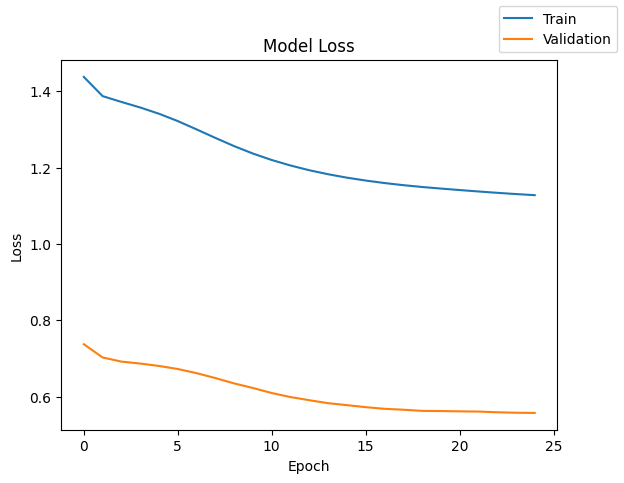

In [ ]:
#Look at loss
print("Time taken in seconds ",end-start)
print(history)
plot(history,'loss')

In [ ]:
#Examine performance
model_0_train_perf = model_performance_classification(model0, X_train, y_train)
model_0_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.716406,0.716406,0.798515,0.740557


In [ ]:
#Examine performance
model_0_valid_perf = model_performance_classification(model0, X_valid, y_valid)
model_0_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.72125,0.72125,0.792402,0.74356


## Model Performance Improvement

### Neural Network with Adam Optimizer

In [ ]:
#Initialize Model 1
model1 = Sequential()
model1.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model1.add(Dense(7,activation="relu"))
model1.add(Dense(1,activation="sigmoid"))
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 14)                  │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Assign Optimizer Model 1
optimizer = tf.keras.optimizers.Adam()    # defining ADAM as the optimizer to be used
model1.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
#Fit Model 1
start = time.time()
history = model1.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.3869 - val_loss: 0.6123
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.2643 - val_loss: 0.5762
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2063 - val_loss: 0.5568
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1818 - val_loss: 0.5478
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1704 - val_loss: 0.5439
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1623 - val_loss: 0.5413
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1557 - val_loss: 0.5397
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.1497 - val_loss: 0.5378
Epoch 9/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1443 - val_loss: 0.5368
Epoch 10/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.1393 - val_loss: 0.5354
Epoch 11/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.1342 - val_loss: 0.5342
Epoch 12/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

Time taken in seconds  17.369961977005005


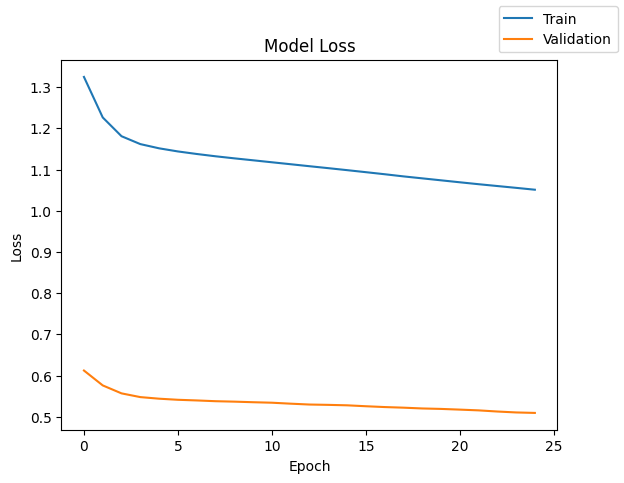

In [ ]:
#Examine Loss Model 1
print("Time taken in seconds ",end-start)
print(history)
plot(history,'loss')

In [ ]:
#Examine Performance Model 1
model_1_train_perf = model_performance_classification(model1, X_train, y_train)
model_1_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.767188,0.767188,0.817439,0.783294


In [ ]:
#Examine Performance Model 1
model_1_valid_perf = model_performance_classification(model1, X_valid, y_valid)
model_1_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.74875,0.74875,0.798219,0.76562


#### Neural Network with Adam Optimizer and Dropout

In [ ]:
#Initialize Model 2
model2 = Sequential()
model2.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model2.add(Dropout(0.4))
model2.add(Dense(7,activation="relu"))
model2.add(Dropout(0.2))
model2.add(Dense(1,activation="sigmoid"))
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 14)                  │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Set Optimizer Model 2
optimizer = tf.keras.optimizers.Adam()    # defining ADAM as the optimizer to be used
model2.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
#Fit Model 2
start = time.time()
history = model2.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.6012 - val_loss: 0.6505
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.4094 - val_loss: 0.6478
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.3631 - val_loss: 0.6215
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.3266 - val_loss: 0.6022
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.3040 - val_loss: 0.5871
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.2824 - val_loss: 0.5790
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.2741 - val_loss: 0.5722
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.2644 - val_loss: 0.5783
Epoch 9/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.2680 - val_loss: 0.5712
Epoch 10/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.2466 - val_loss: 0.5703
Epoch 11/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.2541 - val_loss: 0.5744
Epoch 12/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Time taken in seconds  19.117645263671875


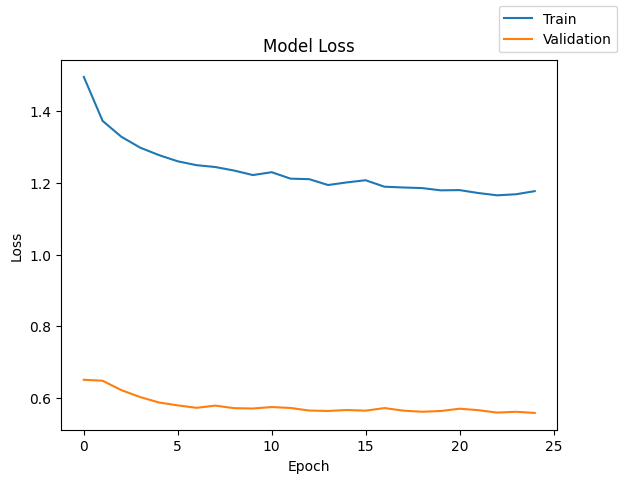

In [ ]:
#Examine Loss Model 2
print("Time taken in seconds ",end-start)
print(history)
plot(history,'loss')

In [ ]:
#Examine Performance Model 2
model_2_train_perf = model_performance_classification(model2, X_train, y_train)
model_2_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.725313,0.725313,0.804726,0.748481


In [ ]:
#Examine Performancer Model 2
model_2_valid_perf = model_performance_classification(model2, X_valid, y_valid)
model_2_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.724375,0.724375,0.800381,0.747171


### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

In [ ]:
#Initialize Model 3 - Need SMOTE import
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Calculate class weights for the SMOTE-balanced dataset
cw_smote = (y_train_smote.shape[0]) / np.bincount(y_train_smote)
cw_smote_dict = {}
for i in range(cw_smote.shape[0]):
    cw_smote_dict[i] = cw_smote[i]

# Model 3: Neural Network with Balanced Data (SMOTE) and SGD Optimizer
tf.keras.backend.clear_session()

model3 = Sequential()
model3.add(Dense(14, activation="relu", input_dim=X_train_smote.shape[1]))
model3.add(Dense(7, activation="relu"))
model3.add(Dense(1, activation="sigmoid"))
model3.summary()

optimizer = tf.keras.optimizers.SGD()
model3.compile(loss='binary_crossentropy', optimizer=optimizer)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4675 - val_loss: 0.6737
Epoch 2/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3776 - val_loss: 0.6550
Epoch 3/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.3360 - val_loss: 0.6427
Epoch 4/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.2879 - val_loss: 0.6286
Epoch 5/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2513 - val_loss: 0.6150
Epoch 6/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2251 - val_loss: 0.6045
Epoch 7/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2032 - val_loss: 0.5972
Epoch 8/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1857 - val_loss: 0.5907
Epoch 9/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1711 - val_loss: 0.5852
Epoch 10/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1582 - val_loss: 0.5805
Epoch 11/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1468 - val_loss: 0.5765
Epoch 12/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

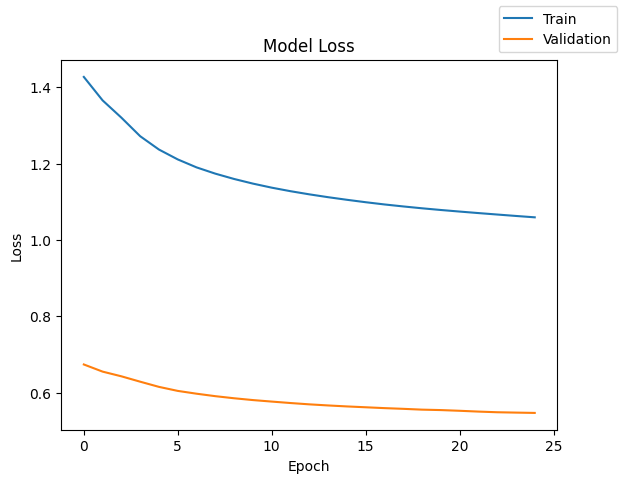

In [ ]:
#Fit and Loss Model 3
start = time.time()
history = model3.fit(X_train_smote, y_train_smote, validation_data=(X_valid, y_valid),
                    batch_size=batch_size, epochs=epochs, class_weight=cw_smote_dict)
end = time.time()

print("Time taken in seconds ", end - start)
print(history)
plot(history, 'loss')

In [ ]:
#Examine Performance Model 3
model_3_train_perf = model_performance_classification(model3, X_train_smote, y_train_smote)
model_3_train_perf

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.743132,0.743132,0.743271,0.743095


In [ ]:
#Examine Performance Model 3
model_3_valid_perf = model_performance_classification(model3, X_valid, y_valid)
model_3_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.7175,0.7175,0.801548,0.741801


### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [ ]:
#Initialize Model 4
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Calculate class weights for the SMOTE-balanced dataset
cw_smote = (y_train_smote.shape[0]) / np.bincount(y_train_smote)
cw_smote_dict = {}
for i in range(cw_smote.shape[0]):
    cw_smote_dict[i] = cw_smote[i]

# Model 4: Neural Network with Balanced Data (SMOTE) and Adam Optimizer
tf.keras.backend.clear_session()

model4 = Sequential()
model4.add(Dense(14, activation="relu", input_dim=X_train_smote.shape[1]))
model4.add(Dense(7, activation="relu"))
model4.add(Dense(1, activation="sigmoid"))
model4.summary()

optimizer = tf.keras.optimizers.Adam()
model4.compile(loss='binary_crossentropy', optimizer=optimizer)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.3541 - val_loss: 0.6011
Epoch 2/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.1967 - val_loss: 0.5642
Epoch 3/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.1423 - val_loss: 0.5537
Epoch 4/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.1203 - val_loss: 0.5432
Epoch 5/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.1034 - val_loss: 0.5385
Epoch 6/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.0884 - val_loss: 0.5359
Epoch 7/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0732 - val_loss: 0.5310
Epoch 8/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0574 - val_loss: 0.5271
Epoch 9/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0414 - val_loss: 0.5225
Epoch 10/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0258 - val_loss: 0.5183
Epoch 11/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0118 - val_loss: 0.5155
Epoch 12/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

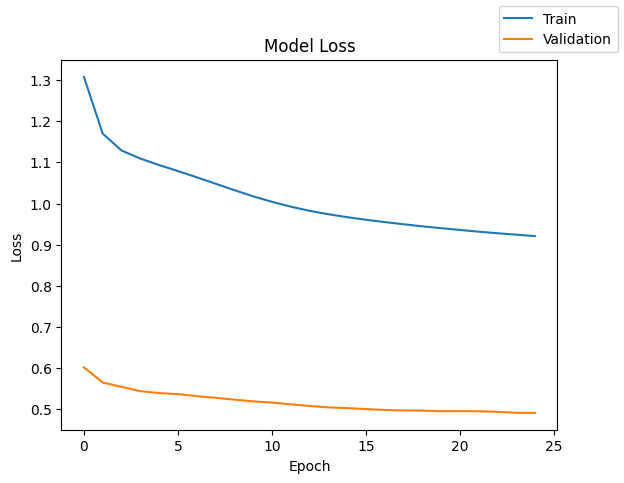

In [ ]:
#Fit and examine loss model 4
start = time.time()
history = model4.fit(X_train_smote, y_train_smote, validation_data=(X_valid, y_valid),
                    batch_size=batch_size, epochs=epochs, class_weight=cw_smote_dict)
end = time.time()

print("Time taken in seconds ", end - start)
print(history)
plot(history, 'loss')

In [ ]:
#Examine Performance Model 4
model_4_train_perf = model_performance_classification(model4, X_train_smote, y_train_smote)
model_4_train_perf

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.78179,0.78179,0.781804,0.781787


In [ ]:
#Examine Performance Model 4
model_4_valid_perf = model_performance_classification(model4, X_valid, y_valid)
model_4_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.761875,0.761875,0.816148,0.778982


### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [ ]:
##Initialize Model 5
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Calculate class weights for the SMOTE-balanced dataset
cw_smote = (y_train_smote.shape[0]) / np.bincount(y_train_smote)
cw_smote_dict = {}
for i in range(cw_smote.shape[0]):
    cw_smote_dict[i] = cw_smote[i]

# Model 5: Neural Network with Balanced Data (SMOTE) and Adam Optimizer and Dropout
tf.keras.backend.clear_session()

model5 = Sequential()
model5.add(Dense(14, activation="relu", input_dim=X_train_smote.shape[1]))
model5.add(Dropout(0.4))
model5.add(Dense(7, activation="relu"))
model5.add(Dropout(0.2))
model5.add(Dense(1, activation="sigmoid"))
model5.summary()

optimizer = tf.keras.optimizers.Adam()
model5.compile(loss='binary_crossentropy', optimizer=optimizer)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.4270 - val_loss: 0.6324
Epoch 2/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.3392 - val_loss: 0.5971
Epoch 3/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.2820 - val_loss: 0.5779
Epoch 4/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.2504 - val_loss: 0.5698
Epoch 5/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.2296 - val_loss: 0.5631
Epoch 6/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.2143 - val_loss: 0.5688
Epoch 7/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.1940 - val_loss: 0.5556
Epoch 8/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.1917 - val_loss: 0.5549
Epoch 9/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.1771 - val_loss: 0.5529
Epoch 10/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.1685 - val_loss: 0.5527
Epoch 11/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.1593 - val_loss: 0.5489
Epoch 12/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

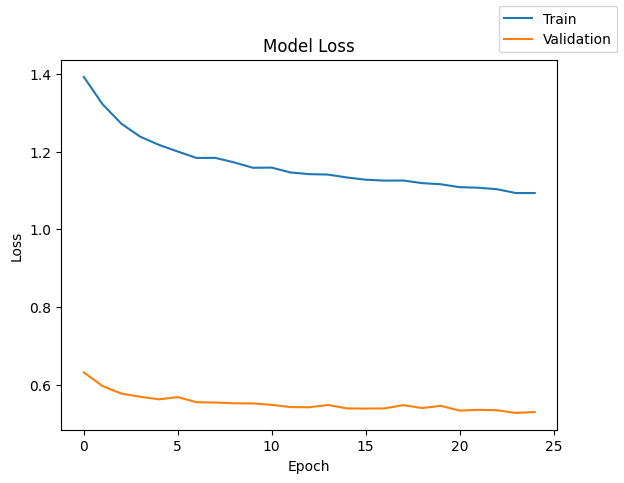

In [ ]:
##Fit and examine loss in Model 5
start = time.time()
history = model5.fit(X_train_smote, y_train_smote, validation_data=(X_valid, y_valid),
                    batch_size=batch_size, epochs=epochs, class_weight=cw_smote_dict)
end = time.time()

print("Time taken in seconds ", end - start)
print(history)
plot(history, 'loss')

In [ ]:
#Examine Performance Model5
model_5_train_perf = model_performance_classification(model5, X_train_smote, y_train_smote)
model_5_train_perf

319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.757162,0.757162,0.757354,0.757117


In [ ]:
#Examine Performance Model 5
model_5_valid_perf = model_performance_classification(model5, X_valid, y_valid)
model_5_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.753125,0.753125,0.813464,0.771747


## Model Performance Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_0_train_perf.T,
        model_1_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
        model_4_train_perf.T,
        model_5_train_perf.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Neural Network (SGD, No Regularization)",
    "Neural Network (Adam Optimizer)",
    "Neural Network (Adam Optimizer with dropout [0.4, 0.2])",
    "Neural Network (SGD with Balanced Data (SMOTE))",
    "Neural Network (Adam Optimizer with Balanced Data (SMOTE))",
    "Neural Network (Adam with Balanced Data (SMOTE) with Dropout [0.4, 0.2])"
]

In [ ]:
#Validation performance comparison

models_valid_comp_df = pd.concat(
    [
        model_0_valid_perf.T,
        model_1_valid_perf.T,
        model_2_valid_perf.T,
        model_3_valid_perf.T,
        model_4_valid_perf.T,
        model_5_valid_perf.T
    ],
    axis=1,
)
models_valid_comp_df.columns = [
    "Neural Network (SGD, No Regularization)",
    "Neural Network (Adam Optimizer)",
    "Neural Network (Adam Optimizer with dropout [0.4, 0.2])",
    "Neural Network (SGD with Balanced Data (SMOTE))",
    "Neural Network (Adam Optimizer with Balanced Data (SMOTE))",
    "Neural Network (Adam with Balanced Data (SMOTE) with Dropout [0.4, 0.2])"
]

In [ ]:
#Display Model Performance Comparison
models_train_comp_df

,"Neural Network (SGD, No Regularization)",Neural Network (Adam Optimizer),"Neural Network (Adam Optimizer with dropout [0.4, 0.2])",Neural Network (SGD with Balanced Data (SMOTE)),Neural Network (Adam Optimizer with Balanced Data (SMOTE)),"Neural Network (Adam with Balanced Data (SMOTE) with Dropout [0.4, 0.2])"
Accuracy,0.716406,0.767188,0.725313,0.743132,0.781790,0.757162
Recall,0.716406,0.767188,0.725313,0.743132,0.781790,0.757162
Precision,0.798515,0.817439,0.804726,0.743271,0.781804,0.757354
F1 Score,0.740557,0.783294,0.748481,0.743095,0.781787,0.757117


In [ ]:
#Display Model Performance Comparison - Validation
models_valid_comp_df

,"Neural Network (SGD, No Regularization)",Neural Network (Adam Optimizer),"Neural Network (Adam Optimizer with dropout [0.4, 0.2])",Neural Network (SGD with Balanced Data (SMOTE)),Neural Network (Adam Optimizer with Balanced Data (SMOTE)),"Neural Network (Adam with Balanced Data (SMOTE) with Dropout [0.4, 0.2])"
Accuracy,0.721250,0.748750,0.724375,0.717500,0.761875,0.753125
Recall,0.721250,0.748750,0.724375,0.717500,0.761875,0.753125
Precision,0.792402,0.798219,0.800381,0.801548,0.816148,0.813464
F1 Score,0.743560,0.765620,0.747171,0.741801,0.778982,0.771747


In [ ]:
##Look specifically at F1 score
models_train_comp_df.loc["F1 Score"] - models_valid_comp_df.loc["F1 Score"]

,F1 Score
"Neural Network (SGD, No Regularization)",-0.003003
Neural Network (Adam Optimizer),0.017673
"Neural Network (Adam Optimizer with dropout [0.4, 0.2])",0.001310
Neural Network (SGD with Balanced Data (SMOTE)),0.001294
Neural Network (Adam Optimizer with Balanced Data (SMOTE)),0.002805
"Neural Network (Adam with Balanced Data (SMOTE) with Dropout [0.4, 0.2])",-0.014629


#Final Model Selection#
We chose F1 as our performance indicator of choice.  With that in mind:
* The Neural Network with Adam Optimizer, balanced data through SMOTE performed the best
* The Nueral Network with the Adam Optimizer and dropout [0.4, 0.2] had the closest F1 match between Training and Validation
* That model performed the best in validation as well indicating the best real-world performance.
* Out of curiosity I traned a Random forest with the same dataset and random search grid parameter training and the best I could get was .587 for F1.

In [ ]:
#Intialize Final Model
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Calculate class weights for the SMOTE-balanced dataset
cw_smote = (y_train_smote.shape[0]) / np.bincount(y_train_smote)
cw_smote_dict = {}
for i in range(cw_smote.shape[0]):
    cw_smote_dict[i] = cw_smote[i]

# Final Model: Neural Network with Balanced Data (SMOTE) and SGD Optimizer
tf.keras.backend.clear_session()

final_model = Sequential()
final_model.add(Dense(14, activation="relu", input_dim=X_train_smote.shape[1]))
final_model.add(Dense(7, activation="relu"))
final_model.add(Dense(1, activation="sigmoid"))
final_model.summary()

optimizer = tf.keras.optimizers.Adam()
final_model.compile(loss='binary_crossentropy', optimizer=optimizer)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Fit final model
start = time.time()
history = final_model.fit(X_train_smote, y_train_smote, validation_data=(X_valid, y_valid),
                    batch_size=batch_size, epochs=epochs, class_weight=cw_smote_dict)
end = time.time()
print("Time taken in seconds ", end - start)


Epoch 1/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.4069 - val_loss: 0.5840
Epoch 2/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2076 - val_loss: 0.5581
Epoch 3/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.1423 - val_loss: 0.5546
Epoch 4/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.1244 - val_loss: 0.5517
Epoch 5/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.1148 - val_loss: 0.5483
Epoch 6/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.1069 - val_loss: 0.5449
Epoch 7/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1000 - val_loss: 0.5428
Epoch 8/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0929 - val_loss: 0.5414
Epoch 9/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.0839 - val_loss: 0.5363
Epoch 10/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0745 - val_loss: 0.5355
Epoch 11/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0652 - val_loss: 0.5326
Epoch 12/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

In [ ]:
#Make predictions from final model
y_train_pred = final_model.predict(X_train)
y_valid_pred = final_model.predict(X_valid)
y_test_pred = final_model.predict(X_test)

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
#Score predictions from final model
print("Classification Report - Train data",end="\n\n")
cr = classification_report(y_train,y_train_pred>0.5)
print(cr)

Classification Report - Train data

              precision    recall  f1-score   support

           0       0.92      0.77      0.84      5096
           1       0.45      0.74      0.56      1304

    accuracy                           0.76      6400
   macro avg       0.69      0.76      0.70      6400
weighted avg       0.83      0.76      0.78      6400



In [ ]:
#Score predictions from final model on validation
print("Classification Report - Validation data",end="\n\n")
cr = classification_report(y_valid,y_valid_pred>0.5)
print(cr)

Classification Report - Validation data

              precision    recall  f1-score   support

           0       0.92      0.75      0.83      1274
           1       0.43      0.74      0.54       326

    accuracy                           0.75      1600
   macro avg       0.68      0.74      0.69      1600
weighted avg       0.82      0.75      0.77      1600



In [ ]:

print("Classification Report - Test data",end="\n\n")
cr = classification_report(y_test,y_test_pred>0.5)
print(cr)

Classification Report - Test data

              precision    recall  f1-score   support

           0       0.92      0.76      0.83      1593
           1       0.44      0.75      0.56       407

    accuracy                           0.76      2000
   macro avg       0.68      0.75      0.69      2000
weighted avg       0.82      0.76      0.78      2000



## Actionable Insights and Business Recommendations

The weighted F1 score on the test data is ~0.76

An F1 score of ~0.76 indicates a good balance between precision and recall, suggesting moderate performance in accurately classifying instances with minimal false positives and false negatives.

Model can be further tuned to deal with minority class (positive exited).





<font size=6 color='blue'>Power Ahead</font>
___